<a href="https://colab.research.google.com/github/joyeee2/py-05/blob/master/wk09_py_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 12-01
## numpy, pandas, matplotlib

### NumPy를 사용한다

- numpy = 데이터를 다루기 위한 수학구조를 지원하는 것(모듈인가?) 숫자, 배열, 행렬, 벡터
- pandas = 데이터를 다루는 클래스와 모듈들이 모여있는 것, R에서 사용하는 데이터 구조 지원(데이터 프레임)
- matplotlib = 강력한 그래픽 ?

In [1]:
# wk05에서 긁어옴, reactions.txt 실행

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving reactions.txt to reactions.txt
User uploaded file "reactions.txt" with length 25000 bytes


In [3]:
ls

bookmark.py  __pycache__/  reactions.txt  sample_data/  testmodule.py


In [0]:
# 파일로부터 데이터를 읽어 들임
# 반응 테스트의 실험 데이터를 읽어 들임
import numpy as np       # numpy을 임포트, 간단하게 사용하기 위해 np로 부르겠다고 선언
# 파일에서 데이터를 읽어 들임 (colab에서 읽어보시오.)
reactions_in_ms = np.loadtxt('reactions.txt')   # loadtxt -> txt읽어오는 함수

In [5]:
# NumPy의 array를 사용한다.
# 데이터 요약 보기
print(reactions_in_ms.size)       # 요소 수를 표시
print(reactions_in_ms[:20])       # 앞에서부터 20개 요소를 표시

# 데이터는 리스트로 저장됨, numpy의 벡터구조로 저장

1000
[664. 481. 511. 612. 526. 498. 441. 447. 685. 477. 525. 686. 685. 485.
 525. 704. 631. 464. 576. 514.]


In [7]:
# array( ) 나눗셈
# 밀리초(ms)를 초(s)로 고침
reactions_in_sec = reactions_in_ms/1000
print(reactions_in_sec[:20])            # 앞에서부터 20개 요소를 표시

[0.664 0.481 0.511 0.612 0.526 0.498 0.441 0.447 0.685 0.477 0.525 0.686
 0.685 0.485 0.525 0.704 0.631 0.464 0.576 0.514]


In [8]:
#numpy 모듈 사용 예

# NumPy의 여러 가지 함수
# 기본 통계를 표시하고 데이터의 요약을 검토
print("평균값 :", np.mean(reactions_in_sec))   # mean = 평균 계산
print("중앙값 :", np.median(reactions_in_sec)) # median = 중앙값 계산
print("표준편차 :", np.std(reactions_in_sec))  # std = 표준편차 계산
print("최솟값 :", np.min(reactions_in_sec))    # min = 최솟값 계산
print("최대값 :", np.max(reactions_in_sec))    # max = 최대값 계산

평균값 : 0.492834
중앙값 : 0.478
표준편차 : 0.10190053210852237
최솟값 : 0.251
최대값 : 0.843


## pandas

- 파이썬에서 데이터를 처리하는 모듈 (R과 유사함)

In [17]:
# pandas의 DataFrame형을 사용한다
import pandas as pd
reactions_df = pd.DataFrame(reactions_in_sec, columns=['react_sec'])  # columns에 이름 붙여줌, df = dataframe
# reaction_in_sec를 pd.DataFrame 구조로 바꿔줌
reactions_df.head()       # 데이터의 개요를 표시

,react_sec
0,0.664
1,0.481
2,0.511
3,0.612
4,0.526


In [18]:
reactions_df.describe()   # 데이터의 평균, 표준 편차, 최댓값, 최솟값 등을 표시    50% = 중앙값

,react_sec
count,1000.000000
mean,0.492834
std,0.101952
min,0.251000
25%,0.417000
50%,0.478000
75%,0.559000
max,0.843000


In [19]:
reactions_df.columns

Index(['react_sec'], dtype='object')

### matplotlib를 사용한다

Text(0,0.5,'frequency')

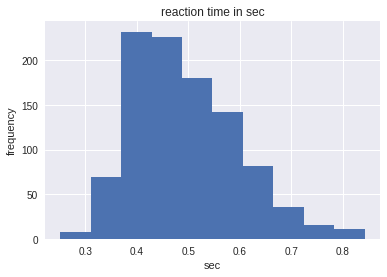

In [21]:
# matplotlib으로 히스토그램을 그린다
%matplotlib inline
import matplotlib.pyplot as plt # matplotlib를 임포트  matplotlib에 그래프를 그리는 모듈이 너무 많음, matplotlib.(그 안의 작은 모듈)
h = plt.hist(reactions_in_sec)  # 히스토그램을 그림

# Add title and axis names
plt.title('reaction time in sec')  # 그래프에 title 붙임
plt.xlabel('sec')                  # x축 이름
plt.ylabel('frequency')            # y축 이름
# plt.show()

***

# Chapter 12-02
## NumPy를 사용한다

### NumPy의 array를 생성한다

In [24]:
# array의 작성
import numpy as np         # NumPy를 임포트
a = np.array([0, 1, 2, 3]) # array를 만듦
a                          # array를 표시

array([0, 1, 2, 3])

In [25]:
# 2차원 array의 작성
b = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
b

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [26]:
# array의 속성
print(b.ndim)       # 차원 수
print(b.shape)      # 각 차원의 요소 수(nxn구조, 행렬)
print(b.size)       # 크기(갯수)
print(b.dtype)      # 형(dtype = data type)

2
(3, 3)
9
int64


In [30]:
a.ndim,a.shape,a.size   # 콤마(,)로 구별  shape에서 (4,)는 (4,1)을 의미

(1, (4,), 4)

reshape(행,열) 함수

In [32]:
# 2차원 배열로 변환한다
# reshape()로 array로 변경
b2 = np.zeros(9).reshape(3, 3)   # 9개의 zero를 만들어서 3x3로 재배치한다
b2

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

전치행렬

In [33]:
# 배열의 회전
# T(전치 행렬)를 표시
# 0,1,2,3,4 5,6,7,8는 3x3의 array
a = np.arange(9).reshape(3, 3)  # arange() means 'array' range()
a     # array 보기

# range 함수 = 리스트 리턴
# arange 함수 = 모든 수치를 처리하는 기준이 배열

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [36]:
a==b

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [37]:
# 전치행렬

a.T    # 90도 회전한 array 보기 : transpose of a matrix

array([[0, 3, 6],
       [1, 4, 7],
       [2, 5, 8]])

In [38]:
a.T == b
# 대각성분(diagonal elements)만 일치

array([[ True, False, False],
       [False,  True, False],
       [False, False,  True]])

### array를 사용한 연산

In [39]:
# 각 요소에 1을 더함
a = np.arange(1, 10)    # 1에서 9까지의 배열을 만듦
a+1                     # !!각 요소!!에 1을 더하여표시 
# 1차원 array에 0차원 숫자 더하는데 계산이 됨!
# 1을 크기가 3x3인 1의 값을 가진 행렬도 변환됨 = 브로드캐스팅 

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])

In [40]:
# 배열의 덧셈
# 2개의 array의 각 요소를 더함
a = np.arange(1, 10)
b = np.arange(1, 10)    # 1에서 9까지의 배열을 2개 만듦
a+b                     # a의 요소와 b의 요소를 더함

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18])

In [0]:
# 배열의 곱셈 1
# 브로드캐스팅(Broadcasting)
a = np.ones(9).reshape(3, 3) # 1로만 구성된 3×3의 array를 만듦  np.원하는숫자+s(크기)
b = np.arange(1, 4)          # 1, 2, 3의 array를 만듦


In [0]:
a,b

In [43]:
# 곱셈한 결과를 표시
a*b 

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [45]:
a*(b.T),b.T   # 1차원 배열의 전치벡터는 자기자신이다!

(array([[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]]), array([1, 2, 3]))

In [47]:
# 배열의 곱셈 2
# 브로드캐스팅을 사용하여 3x3의 array를 만든다
np.zeros((3, 1))*np.zeros((1, 3))   # 앞 행벡터, 뒤 열벡터

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [48]:
# 요소의 합계
# 함수를 사용한 연산
# 0부터 8까지로, 3×3의 array를 만듦
a = np.arange(9).reshape(3, 3)
print(a)
np.sum(a)        # 합계를 계산

[[0 1 2]
 [3 4 5]
 [6 7 8]]


36

In [49]:
# 축끼리의 덧셈을 한다.
# 인수 axis를 준 연산
# [[0 1 2]
#  [3 4 5]
#  [6 7 8]]
# 위 배열의 각 축의 합계를 계산
np.sum(a, axis=0)  # 세로합, 행계산

array([ 9, 12, 15])

In [0]:
np.sum(a, axis=1)  # 가로합, 열계산

### ***요소에의 접근 (중요)***

In [51]:
# 요소에 접근한다, 대괄호 사용[ ] 
a = np.arange(9).reshape(3, 3) # 0부터 8까지로 3×3의 array를 만듦
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [52]:
a[1, 2]                        # 1, 2의 요소를 표시

5

In [53]:
# 슬라이스 이용
# 슬라이스를 사용하여 요소를 추출하기
a[1:, 1:3]             # 오른쪽 아래의 2×2의 배열을 꺼냄 [1:]->1부터 끝까지 [1:3]->1부터 (3-1)=2까지

array([[4, 5],
       [7, 8]])

In [0]:
# 인덱스에 리스트를 지정한다
# 인덱스에 리스트를 전달하여 여러 요소를 추출하기
d = np.arange(1, 10)        # 1에서 9까지의 array를 만듦
d[[1, 3, 5, 7]]             # 짝수만 꺼냄

### array 연결 (중요)

In [55]:
# 횡 방향으로 연결한다
a = np.arange(4).reshape(2, 2)      # 2×2, 0에서 3까지의 array
b = np.arange(5, 9).reshape(2, 2)   # 2×2, 5에서 8까지의 array
np.hstack((a, b))  # 튜플 hstack = 가로

array([[0, 1, 5, 6],
       [2, 3, 7, 8]])

In [56]:
# 종 방향으로 연결한다
a = np.arange(4).reshape(2, 2)      # 2×2, 0에서 3까지의 array
b = np.arange(5, 9).reshape(2, 2)   # 2×2, 5에서 8까지의 array
np.vstack((a, b))   # hstack = 세로

array([[0, 1],
       [2, 3],
       [5, 6],
       [7, 8]])

### np.c_[]  & np._r[]  (column & row)

In [57]:
np.c_[a, b]  # 가로로 배치

array([[0, 1, 5, 6],
       [2, 3, 7, 8]])

In [58]:
np.r_[a, b]  # 세로로 배치

array([[0, 1],
       [2, 3],
       [5, 6],
       [7, 8]])

### array의 복사(copy)

In [60]:
# array끼리의 대입
# 내장 리스트형과 마찬가지로 array의 대입 복사된다
# (변수가 동일한 array에 대한 참조 포함)
a = np.zeros(4)     # 4개의 0으로 array를 만듦
b = a               # b에 대입, ****같은 주소참조**** 그래서 b에 1을 더해도 a에도 더해짐(같은주소라성)
b += 1              # 각 요소에 1을 더함
a                   # a의 내용을 표시 (동일한 주소로 참조)

array([1., 1., 1., 1.])

In [61]:
# 존재하는 array에서 다른 array를 생성하고 싶을 때는 명시적으로 복사한다
a = np.zeros(4)     # 4개의 0으로 array를 만듦
b = a.copy()        # b에 대입
b += 1              # 각 요소에 1을 더함
a,b                 # a,b의 내용을 표시(같은 주소가 아니기 때문에 값이 같지 않음)

(array([0., 0., 0., 0.]), array([1., 1., 1., 1.]))

***

## [wk10] homework

> 다음 Youtube 강의 2편를 들으면서 파이썬 노트북을 하나 만들어서 각자의 github에 올리시오.(마감: 2018.11.3(토). 24:00)

#### 제출 파일명: Summary_numpy.ipynb


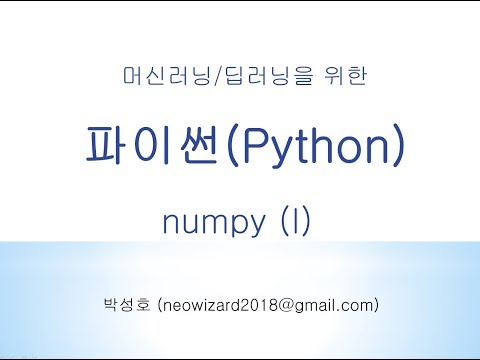

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('ku9-AxaznSA')  # numpy 기초 I

In [0]:
YouTubeVideo('dnJ3JESmBkE')  # numpy 기초 II

In [0]:
A= np.array([1,2,3])
B= np.array([4,5,6])

In [0]:
A-B,A*B,A/B,A%B,A//B,B//A

In [0]:
C= np.array([1,2,3])
D=C.reshape(1,3)   
# C와D 다른가? == 다름

In [0]:
C,D   # 

In [0]:
C.shape,D.shape

***